In [1]:
import time
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import math
import sys
import os
sys.path.append("/Users/charlottebeylier/Documents/PhD/Atari1.0/Reinforcement-Learning_modif/cgames/02_space_invader/Experiments/Analysis")
from Generate_data_activity import Generate_data
from Manifold_Analysis import Manifold_analysis
from CCA_analysis import CCA_Analysis
sys.path.append("/Users/charlottebeylier/Documents/PhD/Atari1.0/Reinforcement-Learning_modif")

from algos.agents import A2CAgent
from algos.models import ActorCnn, CriticCnn
from algos.preprocessing.stack_frame import preprocess_frame, stack_frame

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cross_decomposition import CCA
import pandas as pd
import seaborn as sns
import cv2
from tabulate import tabulate
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
import matplotlib.pyplot as plt    
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import warnings
from scipy.sparse import (spdiags, SparseEfficiencyWarning, csc_matrix,
    csr_matrix, isspmatrix, dok_matrix, lil_matrix, bsr_matrix)
warnings.simplefilter('ignore',SparseEfficiencyWarning)

import warnings
warnings.filterwarnings("ignore")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

/opt/anaconda3/envs/atari1.0/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


Device:  cpu


# Generate DATA

In [2]:
LENGTH_TRIAL = 500
EPISODES = 10


Generate_DATA = Generate_data(device)
Liste_activation,Final_score,Liste_position_agent,Liste_position_alien,Liste_action_agent= Generate_DATA.run_episodes(structure_network = "a2c_AE",length_trial = LENGTH_TRIAL,number_episode = EPISODES)

A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


Names_hook ['Conv_1', 'Conv_2', 'Conv_3', 'fc1', 'Conv_1_bis', 'Conv_2_bis', 'Conv_3_bis', 'fc1_bis']
/Users/charlottebeylier/Documents/PhD/Atari1.0/Reinforcement-Learning_modif/cgames/02_space_invader/Experiments/Trained_Models/Models_training_a2c_AE_space_invader/agent_a2c_AE_1000.pt


[W NNPACK.cpp:80] Could not initialize NNPACK! Reason: Unsupported hardware.



Episode :0 	Agent number :0 	Final score: 100.00 	Number of steps: 469
Episode :0 	Agent number :0 	Final score: 310.00 	Number of steps: 961
Episode :1 	Agent number :0 	Final score: 55.00 	Number of steps: 442
Episode :1 	Agent number :0 	Final score: 565.00 	Number of steps: 1080
Episode :2 	Agent number :0 	Final score: 210.00 	Number of steps: 788
Episode :3 	Agent number :0 	Final score: 50.00 	Number of steps: 571
Episode :4 	Agent number :0 	Final score: 90.00 	Number of steps: 534
Episode :5 	Agent number :0 	Final score: 380.00 	Number of steps: 1022
Episode :6 	Agent number :0 	Final score: 60.00 	Number of steps: 436
Episode :6 	Agent number :0 	Final score: 235.00 	Number of steps: 1121
Episode :7 	Agent number :0 	Final score: 20.00 	Number of steps: 369
Episode :7 	Agent number :0 	Final score: 55.00 	Number of steps: 615
Episode :8 	Agent number :0 	Final score: 325.00 	Number of steps: 843
Episode :9 	Agent number :0 	Final score: 155.00 	Number of steps: 709

In [4]:
Names_hook = ["Conv_1","Conv_2","Conv_3","fc1","Conv_1_bis","Conv_2_bis","Conv_3_bis","fc1_bis"]
analysis = Manifold_analysis(LENGTH_TRIAL)
Prepro_length = True
activity_layer = [[[[] for i in range(len(Names_hook))] for j in range(1)] for episode in range(EPISODES)]

for agent_number in range(1):
    print(agent_number)
    for layer in range(len(Names_hook)):
        for episode in range(EPISODES):
            activity_layer[episode][agent_number][layer] = analysis.prepro(Liste_activation[episode][agent_number][layer],Prepro_length)

0


In [5]:
episode = 0
agent = 5
layer = 2

In [40]:
X = activity_layer[episode][agent_number][0]
pca = PCA(n_components = 5) #we have 20 features
X_tr = pca.fit(X).transform(X)

In [30]:
print(X.shape)
print(X_tr.shape)

(500, 12800)
(500, 5)


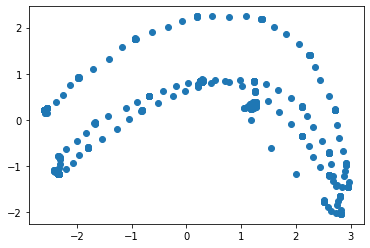

In [38]:
plt.figure()
plt.scatter(X_tr[:,0],X_tr[:,4])

In [41]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X)
X_embedded.shape

(500, 2)

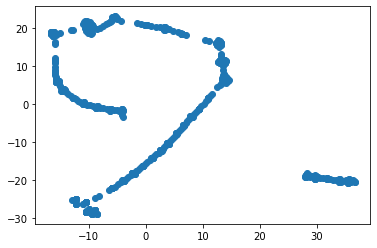

In [43]:
plt.figure()
plt.scatter(X_embedded[:,0],X_embedded[:,1])